In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import os
from scipy.special import factorial

In [2]:
def heterogeneity_index(graph):
    degrees_list = []
    sum_difference = 0
    for node_index, deg in graph.degree():
        degrees_list.append(deg)
    degrees = np.array(degrees_list)
    N = len(degrees)
    mean_degree = np.mean(degrees)

    for i in range(N):
        for j in range(N):
            sum_difference += abs(degrees[i]-degrees[j])

    H = sum_difference / (2 * N ** 2 * mean_degree)
    return H

In [3]:
def gini_index(degrees):
    sorted_degrees = np.sort(degrees)
    N = len(degrees)
    lorenz_curve = np.cumsum(sorted_degrees) / np.sum(sorted_degrees)
    lorenz_curve = np.insert(lorenz_curve, 0, 0)
    x_axis = np.linspace(0.0, 1.0, N+1)
    lorenz_curve_percent = lorenz_curve*100
    x_axis_percent = x_axis*100
    B = np.trapz(lorenz_curve, x=x_axis)
    G = 1 - 2*B
    return G, lorenz_curve_percent, x_axis_percent

In [4]:
def plot_lorenz_curve(x_axis, lorenz_curve):
    plt.figure(figsize=(6,6))
    plt.plot(x_axis, lorenz_curve, label="Lorenz Curve", color="red", linestyle="--",)
    plt.plot([0,1],[0,1],color="green",  label="Equality Line")
    plt.fill_between(x_axis, lorenz_curve, x_axis, color="lightgreen", alpha=0.5)
    plt.title("Lorenz Curve")
    plt.xlabel("Cumulative Percentage of Nodes (%)")
    plt.ylabel("Cumulative Percentage of Degrees (%)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    save_dir = "pics"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  
    
    save_path = os.path.join(save_dir, "Lorenz_Curve_First.png")
    plt.savefig(save_path) 

Heterogeneity Index:  0.3451255930087391
Gini Index:  0.345125593008739


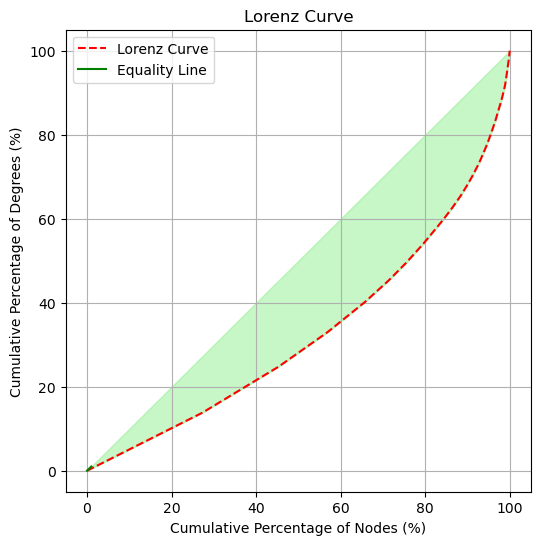

<Figure size 640x480 with 0 Axes>

In [5]:
G = nx.barabasi_albert_graph(450, 5)
H = heterogeneity_index(G)
print("Heterogeneity Index: ", H)
degrees = np.array([deg for _, deg in G.degree()])
gini, lorenz_curve, x_axis = gini_index(degrees)
print("Gini Index: ", gini)
plot_lorenz_curve(x_axis, lorenz_curve)

In [6]:
def heterogeneity_index_second(G):
    degrees = [deg for _,deg in G.degree()]
    total_degree = np.sum(degrees)
    W = degrees / total_degree
    N = len(G.nodes)

    final = 0
    
    for i in range(N):
        sum1 = np.sum(W[:i])
        sum1 -= W[i]
        sum2 = np.sum(W[i])
        final += (sum1+sum2)/N


    H = 1-2*(1/2*final)        
    return H

H = heterogeneity_index(G)
print("Heterogeneity Index: ", H)

Heterogeneity Index:  0.3451255930087391


In [7]:
def calculate_SB(G):
    N = len(G.nodes) 
    degrees = np.array([deg for _, deg in G.degree()]) 
    M = max(degrees)   
    T = np.sum(degrees) 

    P = np.array([np.sum(degrees == k) for k in range(1, M + 1)]) / N

    term1 = 0.5 * P[0] ** 2 * N / T
    term2 = 0
    for j in range(1, M):  
        sum1 = 0
        sum2 = 0
        for i in range(j):
            sum1 += P[i] * N * (i + 1) / T
        for i in range(j + 1): 
            sum2 += P[i] * N * (i + 1) / T
        term2 += 0.5 * P[j] * (sum1 + sum2)

    SB = term1 + term2
    return SB

SB = calculate_SB(G)

print("S_B for the given graph:", 1 - 2 * SB)

S_B for the given graph: 0.34512559300873924


In [8]:
def calculate_SB_second(G):
    N = len(G.nodes)
    degrees = np.array([deg for _, deg in G.degree()])
    M = max(degrees)
    T = np.sum(degrees)

    P = np.array([np.sum(degrees == k) for k in range(1, M + 1)]) / N
    term1 = 0.5 * P[0] ** 2 * N / T

    term2 = 0
    for j in range(1, M):
        sum1 = 0
        for i in range(j):
            sum1 += P[i] * N * (i + 1) / T
        term2 += 0.5 * P[j] * (2 * sum1 + P[j] * N * (j + 1) / T)

    SB = term1 + term2
    return SB

SB = calculate_SB(G)
SB1 = calculate_SB_second(G)
print("S_B for the given graph:",SB)
print("S_B for the given graph (second):",SB1)

S_B for the given graph: 0.3274372034956304
S_B for the given graph (second): 0.32743720349563044


In [9]:
def calculate_total_degree(G):
    N = len(G.nodes)
    degrees = [deg for _,deg in G.degree()]
    T = 0

    max_degree = max(degrees)
    for K in range(1,max_degree+1):
        P_K = degrees.count(K) / len(degrees)
        T += P_K * N * K
    return T

d = calculate_total_degree(G)
print("Total degree: ", d)    

Total degree:  4450.0


In [10]:
def calculate_total_degree_second(G):
    N = len(G.nodes)
    degrees = [deg for _,deg in G.degree()]
    k = np.average(degrees)

    return N * k

d = calculate_total_degree_second(G)
print("Total degree: ", d)

Total degree:  4450.0


In [11]:
def calculate_H_by_SB(G):
    N = len(G.nodes)  
    degrees = np.array([deg for _, deg in G.degree()])
    M = max(degrees)
    T = np.sum(degrees)
    
    P = np.array([np.sum(degrees == k) for k in range(1, M + 1)]) / N
    
    term1 = 1 - (P[0] ** 2 * N / T)
    
    term2 = 0
    for j in range(1, M):
        sum1 = 0
        for i in range(j):
            sum1 += P[i] * (i + 1) / T 
        term2 += P[j] * (2 * N * sum1 + P[j] * N * (j + 1) / T)
    
    H = term1 - term2
    return H

H = calculate_H_by_SB(G)
print("Heterogeneity Index: ", H)

Heterogeneity Index:  0.34512559300873935


In [12]:
def calculate_H_by_SB_second(G):
    N = len(G.nodes)
    degrees = [deg for _,deg in G.degree()]
    T = np.sum(degrees)
    P = degrees / T
    sorted_degrees = np.sort(degrees)
    k = np.average(degrees)

    term1 = 1 - (P[0] ** k)

    term2 = 0
    for j in range(1, sorted_degrees[-1]+1):
        sum1 = 0

        for i in range(j):
            sum1 += P[i] * (i+1) / k
        term2 += P[j] * (2*sum1 + (P[j] * (j+1) /k))
        
    H = term1 - term2
    return H

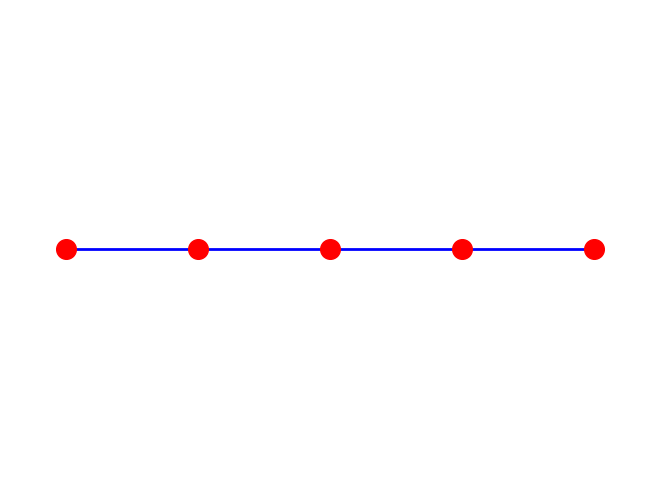

H:  0.15


<Figure size 640x480 with 0 Axes>

In [13]:
n = 5
G1 = nx.path_graph(n)
pos = {i: (i, 0) for i in range(len(G1))}
nx.draw(G1, pos, with_labels=False, node_color='r', node_size=200, edge_color='b', width=2)
plt.show()

save_dir = "pics"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  

save_path = os.path.join(save_dir, "path_graph.png")
plt.savefig(save_path) 

h = heterogeneity_index(G1)
print("H: ", h)

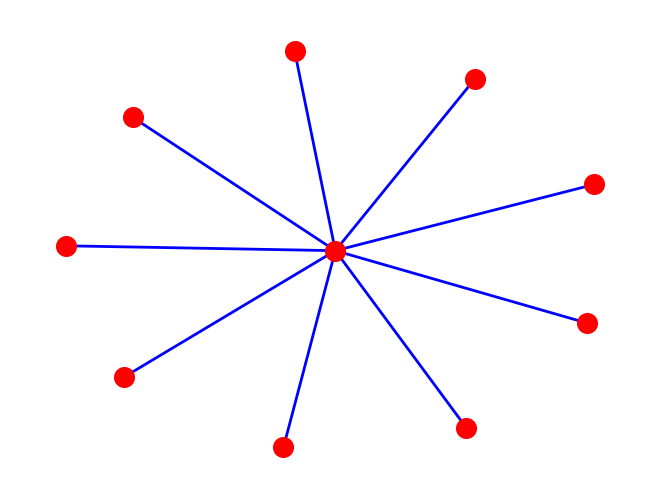

H:  0.4


<Figure size 640x480 with 0 Axes>

In [14]:
n = 9
G2 = nx.star_graph(n)
nx.draw(G2,with_labels=False, node_color='r', node_size=200, edge_color='b', width=2)
plt.show()
save_dir = "pics"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  

save_path = os.path.join(save_dir, "star_graph.png")
plt.savefig(save_path) 
h = heterogeneity_index(G2)
print("H: ",h)

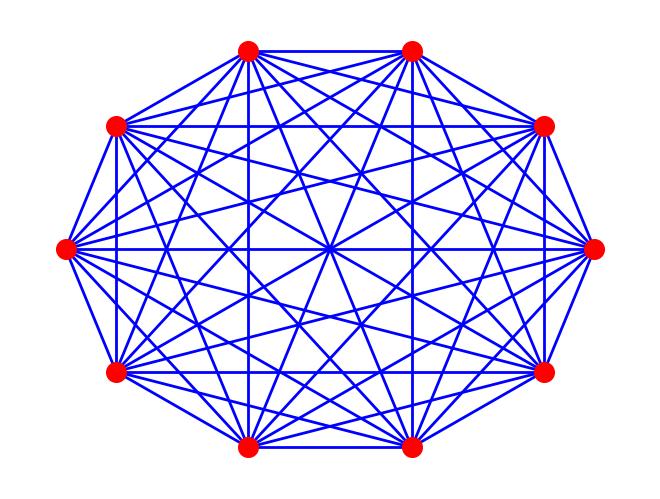

H:  0.0


<Figure size 640x480 with 0 Axes>

In [15]:
n = 10
G3 = nx.complete_graph(n)
pos = nx.circular_layout(G3)
nx.draw(G3, pos,with_labels=False, node_color='r', node_size=200, edge_color='b', width=2)
plt.show()
save_dir = "pics"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  

save_path = os.path.join(save_dir, "complete_graph.png")
plt.savefig(save_path) 
h = heterogeneity_index(G3)
print("H: ",h)

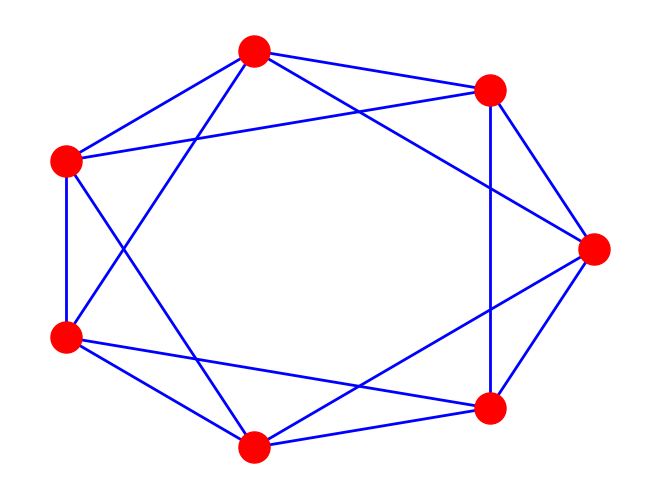

H:  0.0


<Figure size 640x480 with 0 Axes>

In [16]:
n = 7
G4 = nx.cycle_graph(n)
for i in range(n):
    G4.add_edge(i, (i+2) % n)

pos = nx.circular_layout(G4)
nx.draw(G4, pos, with_labels=False, node_color='r', node_size=500, edge_color='b', width=2)
plt.show()

save_dir = "pics"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  

save_path = os.path.join(save_dir, "cycle_graph.png")
plt.savefig(save_path) 

h = heterogeneity_index(G4)
print("H: ",h)

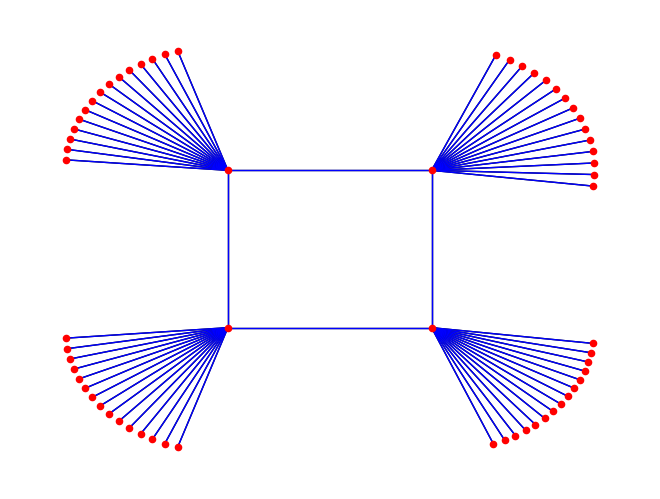

H:  0.46875


<Figure size 640x480 with 0 Axes>

In [17]:
def draw_graph(n):
    G = nx.Graph()
    rectangle_points = [(0, 0), (1, 0), (1, 1), (0, 1)]
    
    for i, point in enumerate(rectangle_points):
        G.add_node(i, pos=point)

    G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

    external_nodes = []
    distance = 0.8 
    
    angle_ranges = [
        (-3*np.pi / 5, - 5*np.pi / 5), 
        (-0.2*np.pi / 5, -2*np.pi / 5),
        (-0.2*np.pi / 5, 2*np.pi / 5),
        (3 * np.pi / 5, 5 * np.pi / 5)
    ]

    for i, (x, y) in enumerate(rectangle_points):
        angle_min, angle_max = angle_ranges[i]
        base_angle = (angle_max - angle_min) / n 
        
        for j in range(n):
            angle = angle_min + j * base_angle
            
            ext_x = x + distance * np.cos(angle)
            ext_y = y + distance * np.sin(angle)
            external_node = len(G.nodes)
            G.add_node(external_node, pos=(ext_x, ext_y))
            external_nodes.append(external_node)
            G.add_edge(i, external_node)

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, node_color='red', with_labels=False, node_size=20)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, edge_color='b')    

    plt.show()

    save_dir = "pics"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  
    
    save_path = os.path.join(save_dir, "customized_graph.png")
    plt.savefig(save_path) 

    h = heterogeneity_index(G)
    print("H: ",h)

n = 15
draw_graph(n)

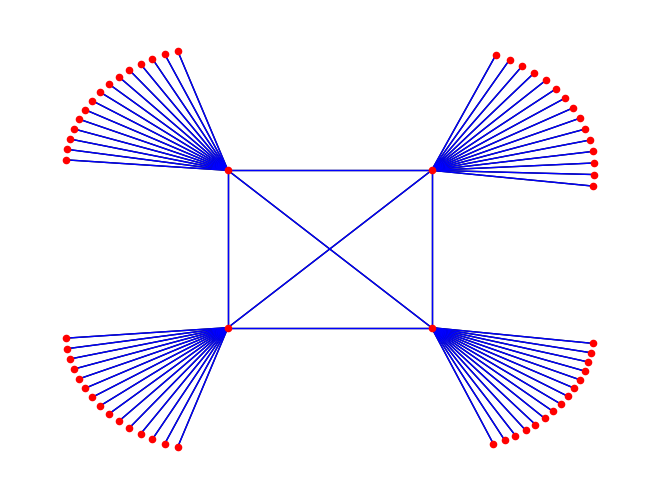

H:  0.48295454545454547


<Figure size 640x480 with 0 Axes>

In [18]:
def draw_graph(n):
    G = nx.Graph()

    rectangle_points = [(0, 0), (1, 0), (1, 1), (0, 1)]
    
    for i, point in enumerate(rectangle_points):
        G.add_node(i, pos=point)

    G.add_edges_from([(0, 2), (1, 3)])
    
    G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

    external_nodes = []
    distance = 0.8 
    
    angle_ranges = [
        (-3*np.pi / 5, - 5*np.pi / 5),  
        (-0.2*np.pi / 5, -2*np.pi / 5),
        (-0.2*np.pi / 5, 2*np.pi / 5),
        (3 * np.pi / 5, 5 * np.pi / 5)
    ]

    for i, (x, y) in enumerate(rectangle_points):
        angle_min, angle_max = angle_ranges[i]
        base_angle = (angle_max - angle_min) / n 
        
        for j in range(n):
            angle = angle_min + j * base_angle
            ext_x = x + distance * np.cos(angle)
            ext_y = y + distance * np.sin(angle)
            external_node = len(G.nodes)
            G.add_node(external_node, pos=(ext_x, ext_y))
            external_nodes.append(external_node)
            G.add_edge(i, external_node)

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, node_color='red', with_labels=False, node_size=20)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges, edge_color='b')

    plt.show()

    save_dir = "pics"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  
    
    save_path = os.path.join(save_dir, "customized_graph_2.png")
    plt.savefig(save_path) 

    h = heterogeneity_index(G)
    print("H: ",h)

n = 15
draw_graph(n)

In [19]:
def heterogeneity_index_PLN(G, gamma):
    degrees = sorted([deg for _, deg in G.degree()], reverse=True)
    N = len(degrees)
    l = 1 / (gamma-1)
    
    sum_r = np.sum([r ** -l for r in range(1, N+1)])

    H = 1
    for i in range(1, N+1):
        sum_term = 0

        for k in range(1, i+1):
            sum_term += (N+1-k) ** -l
            
        H -= (1 / N) * (2 * (sum_term / sum_r - (N + 1 - i) ** -l / sum_r))

    return H
    
gamma = 2.5
H = heterogeneity_index_PLN(G, gamma)
print("Heterogeneity index H for the graph: ",H)

Heterogeneity index H for the graph:  0.4443315585770196


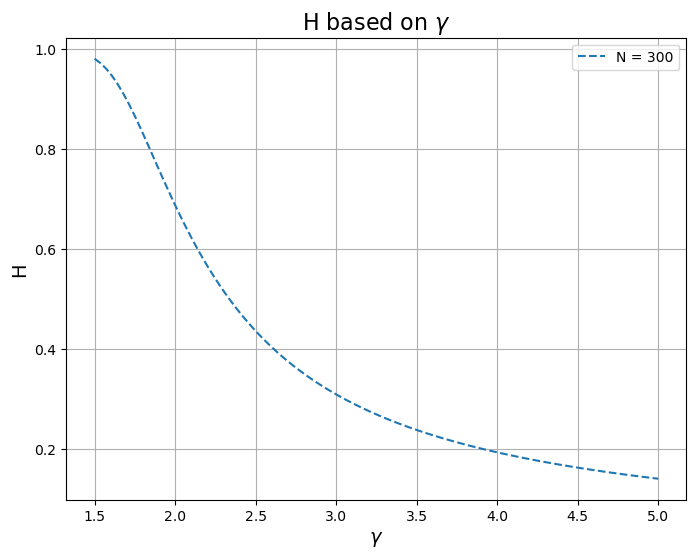

<Figure size 640x480 with 0 Axes>

In [20]:
def plot_heterogeneity_index(gammas, G):
    plt.figure(figsize=(8, 6))
    
    H_values = []
    for gamma in gammas:
        H = heterogeneity_index_PLN(G, gamma)
        H_values.append(H)
    
    plt.plot(gammas, H_values, label=f'N = {len(G)}', linestyle='--')

    plt.xlabel(r'$\gamma$', fontsize=14)
    plt.ylabel(r'H', fontsize=14)
    plt.title(r'H based on $\gamma$', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

    save_dir = "pics"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  
    
    save_path = os.path.join(save_dir, "H_based_landa.png")
    plt.savefig(save_path) 


G12 = nx.barabasi_albert_graph(300, 3)
gamma_range = np.linspace(1.5, 5, 100)
plot_heterogeneity_index(gamma_range, G12)

In [21]:
def poisson_distribution(G):
    N = len(G.nodes)
    E = G.number_of_edges()
    complete_edges = N * (N+1) / 2
    p = E / complete_edges if complete_edges > 0 else 0
    k_mean = p * (N-1)
    degrees = [deg for _,deg in G.degree()]
    
    poisson = [(k_mean ** k) * np.exp(-k_mean) / factorial(k) for k in degrees]
    poisson = [float(val) for val in poisson]
    return poisson

N = 100
p = 0.5
G13 = nx.erdos_renyi_graph(N,p)
result = poisson_distribution(G13)
print("Poisson distribution: ", result)

Poisson distribution:  [0.033705508610851725, 0.05671208724868939, 0.05296859165332053, 0.055912105636703444, 0.055912105636703444, 0.04297890045539706, 0.04539337465945496, 0.050924717577864737, 0.055912105636703444, 0.016803021204594887, 0.053880773575190596, 0.03840526459307421, 0.04722271036728183, 0.05671208724868939, 0.055912105636703444, 0.055912105636703444, 0.053880773575190596, 0.05296859165332053, 0.03840526459307421, 0.04297890045539706, 0.056882372481365795, 0.03840526459307421, 0.03840526459307421, 0.05538838705798435, 0.05671208724868939, 0.020513533520253396, 0.033705508610851725, 0.050924717577864737, 0.05538838705798435, 0.05671208724868939, 0.04297890045539706, 0.05671208724868939, 0.04297890045539706, 0.04539337465945496, 0.050924717577864737, 0.050924717577864737, 0.053880773575190596, 0.033705508610851725, 0.04957675615777384, 0.020513533520253396, 0.05671208724868939, 0.02906191175491792, 0.04722271036728183, 0.016803021204594887, 0.050924717577864737, 0.05688237

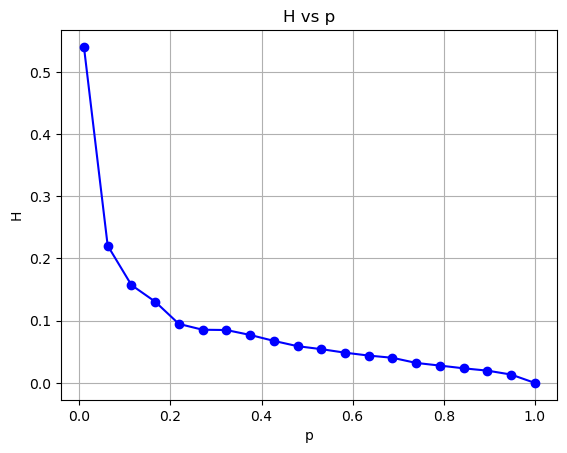

<Figure size 640x480 with 0 Axes>

In [22]:
def plot_H_vs_p(graph_func, N):
    p_values = np.linspace(0.01, 1, 20)
    H_values = []

    for p in p_values:
        G = graph_func(N, p)
        H = heterogeneity_index(G)
        H_values.append(H)

    plt.plot(p_values, H_values, marker='o', color='blue')
    plt.xlabel('p')
    plt.ylabel('H')
    plt.title('H vs p')
    plt.grid(True)
    plt.show()

    save_dir = "pics"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)  
    
    save_path = os.path.join(save_dir, "H_VS_P.png")
    plt.savefig(save_path) 




plot_H_vs_p(nx.erdos_renyi_graph, 100)